In [22]:
import xarray as xr
from utility_programs import filters
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt

from cartopy.feature.nightshade import Nightshade
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
ds = xr.open_dataset('/home/axb170054/scratch/agu2023/new_sat_interp/full-justedens_SAMI-REGRID.nc', engine='h5netcdf')

In [35]:
cmin = -.5
cmax =  .5


t = '2013-03-17T09:05:00.000000000'

alts = [100, 200, 300, 400, 500, 600, 700, 800]


In [36]:
fitted_data = []
for a in alts:
    fitted_data.append(filters.make_fits(ds.edens.where(ds.alt>a).dropna(dim='alt', how='any').integrate('alt')/1e7, percent=False).sel(time=t))

In [48]:
axs.shape

(4, 2)

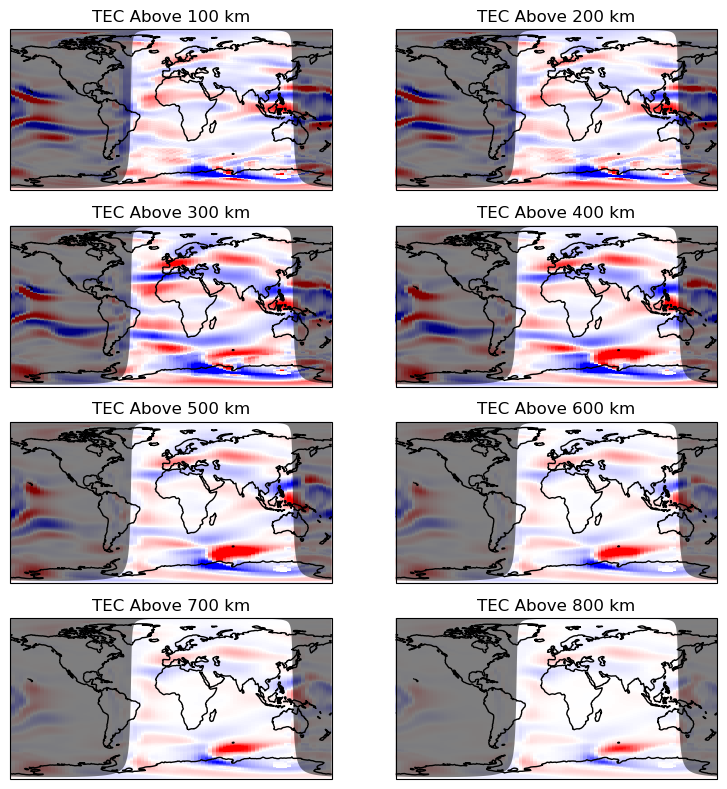

In [58]:

fig, axs = plt.subplots(4, 2, figsize=(8,8), subplot_kw=dict(projection=ccrs.PlateCarree()))


for i, ax in enumerate(axs.flatten()):
    
    c = fitted_data[i].plot(x='lon', vmin=cmin, vmax=cmax, 
                            cmap='bwr', ax=ax, 
                            add_colorbar=False,)

    ax.coastlines()
    ax.add_feature(Nightshade(pd.Timestamp(t)))

    ax.set_title('TEC Above %i km'%alts[i])


fig.tight_layout()
plt.show();


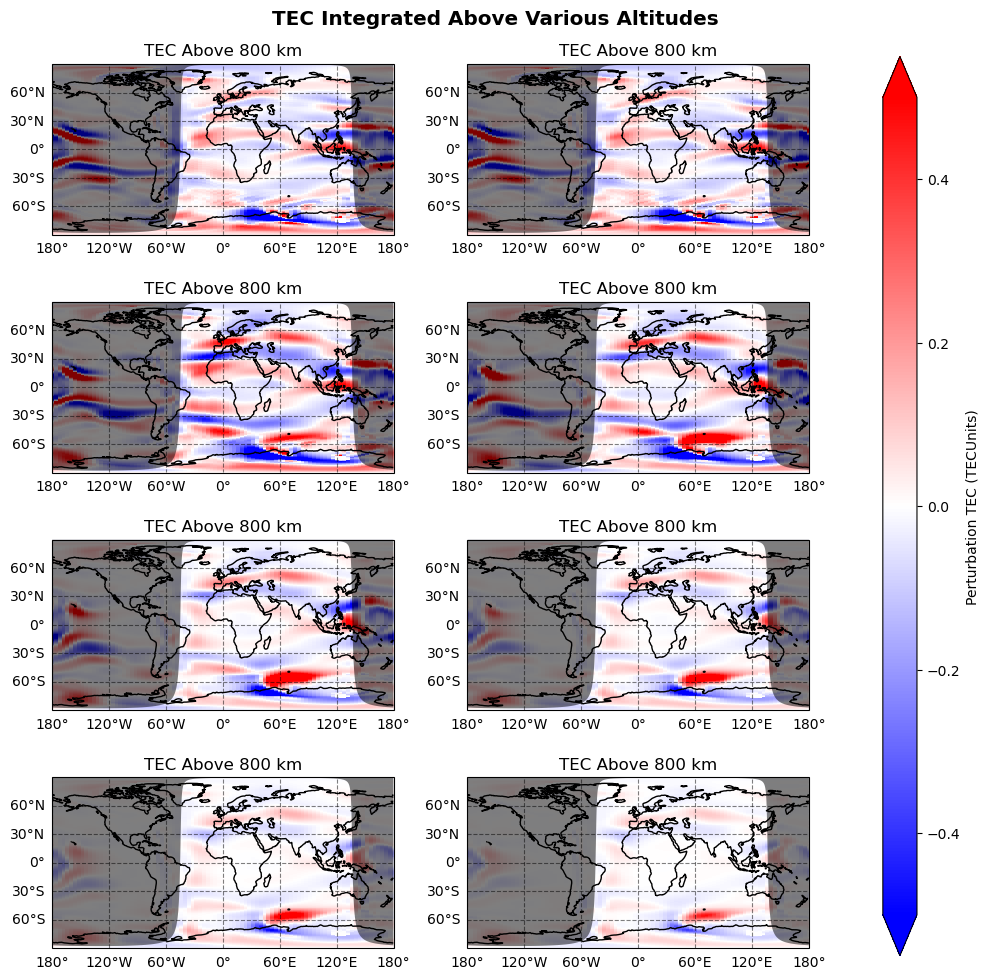

In [96]:
# better way - use GridSpec
# It allows for more control of the subplot layout
# For this basic plot, I would not use gridspec, but for more complex plots I always use gridspec
#  since it allows for SO much more control over the output figure.

fig = plt.figure(figsize=(10,10))

specs = fig.add_gridspec(4, 3, width_ratios=[1,1,.1])

# 4 rows, 2 columns. the last column is for the colorbar

# This is a little sub-optimal since we already have alts, but I'll make it work...
# See here for more info
# https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py

axes = []
alt_idx = 0
for row in range(4):
    for col in range(2):
        axes.append(fig.add_subplot(specs[row, col], projection=ccrs.PlateCarree()))
        c = fitted_data[alt_idx].plot(x='lon', vmin=cmin, vmax=cmax, 
                                cmap='bwr', ax=axes[-1], 
                                add_colorbar=False,)

        alt_idx += 1

        axes[-1].coastlines()
        axes[-1].add_feature(Nightshade(pd.Timestamp(t)))

        # I would leave this off, or just turn on for some, but here is how to add gridlines & labels
        axes[-1].gridlines(draw_labels=['bottom', 'left'], 
                           linestyle='--', color='k', alpha = 0.5)
    
        axes[-1].set_title('TEC Above %i km'%alts[i])

# Create colorbar axes and draw it
cbar_ax = fig.add_subplot(specs[:,-1])
# Draw colorbar with cax, not ax, to tell matplotlib to use the whole axes
cbar = fig.colorbar(c, cax=cbar_ax, label='Perturbation TEC (TECUnits)', extend='both')

fig.suptitle('TEC Integrated Above Various Altitudes', fontweight='heavy', fontsize='x-large')
fig.tight_layout()

fig.show();

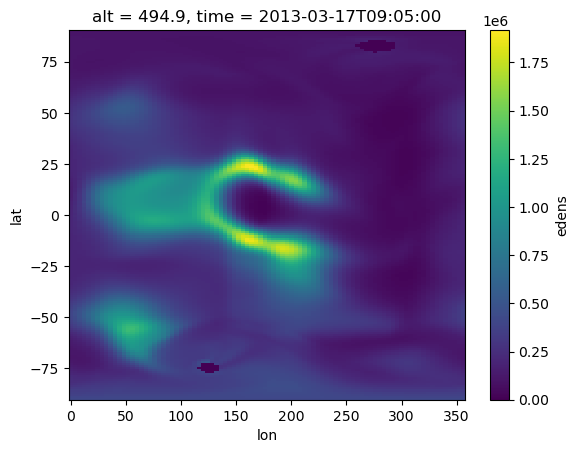

In [23]:
ds.edens.sel(alt=500, time=t, method='nearest').plot(x='lon')

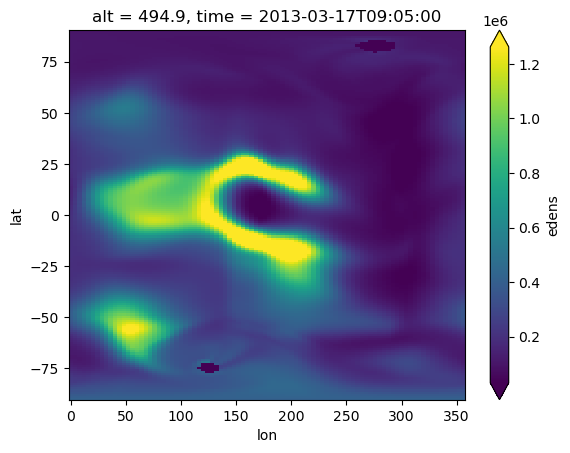

In [24]:
ds.edens.sel(alt=500, time=t, method='nearest').plot(x='lon', robust=True)

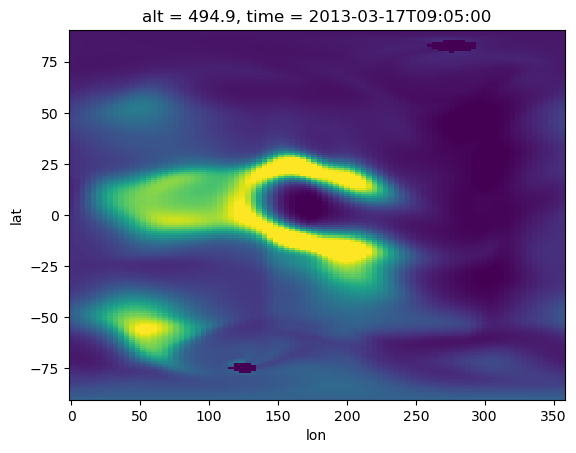

In [25]:
ds.edens.sel(alt=500, time=t, method='nearest').plot(x='lon', robust=True, add_colorbar=False)

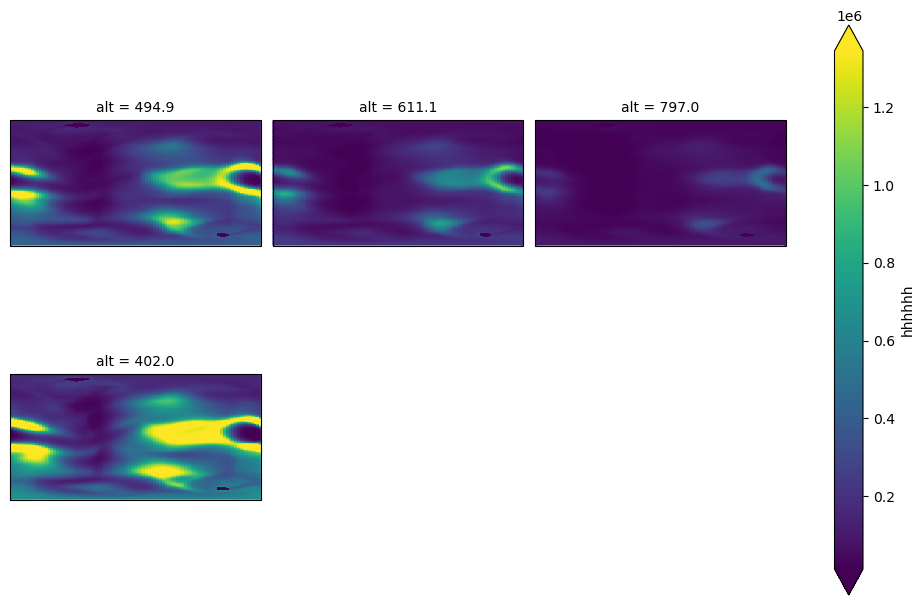

In [101]:
ds.edens.sel(alt=[500, 600, 800, 400], time=t, method='nearest').plot(x='lon', robust=True, cbar_kwargs={'label':'hhhhhh'}, subplot_kws={'projection':ccrs.PlateCarree()}, col='alt', col_wrap=3)